In [1]:
import requests as req
from matplotlib import pyplot as plt
import apimoex
import pandas as pd

In [2]:
def history(ticker):
    with req.Session() as session:
        ticker = ticker
        data = apimoex.get_board_history(session,ticker)
        df = pd.DataFrame(data)
        df['TRADEDATE']=pd.to_datetime(df['TRADEDATE'])
        df.rename(columns= {'CLOSE':'COSTS'},inplace=True)
        df['year']=df['TRADEDATE'].dt.year
        result = df.pivot_table(index='year',
                                values = 'COSTS',
                                aggfunc='max').plot(figsize=(15,9), 
                                                    grid=True, kind='bar',
                                                    ylabel='Стоимость', 
                                                    title ='Максимальная стоимость акций {}'.format(ticker))
         
        
       
    return result,
    

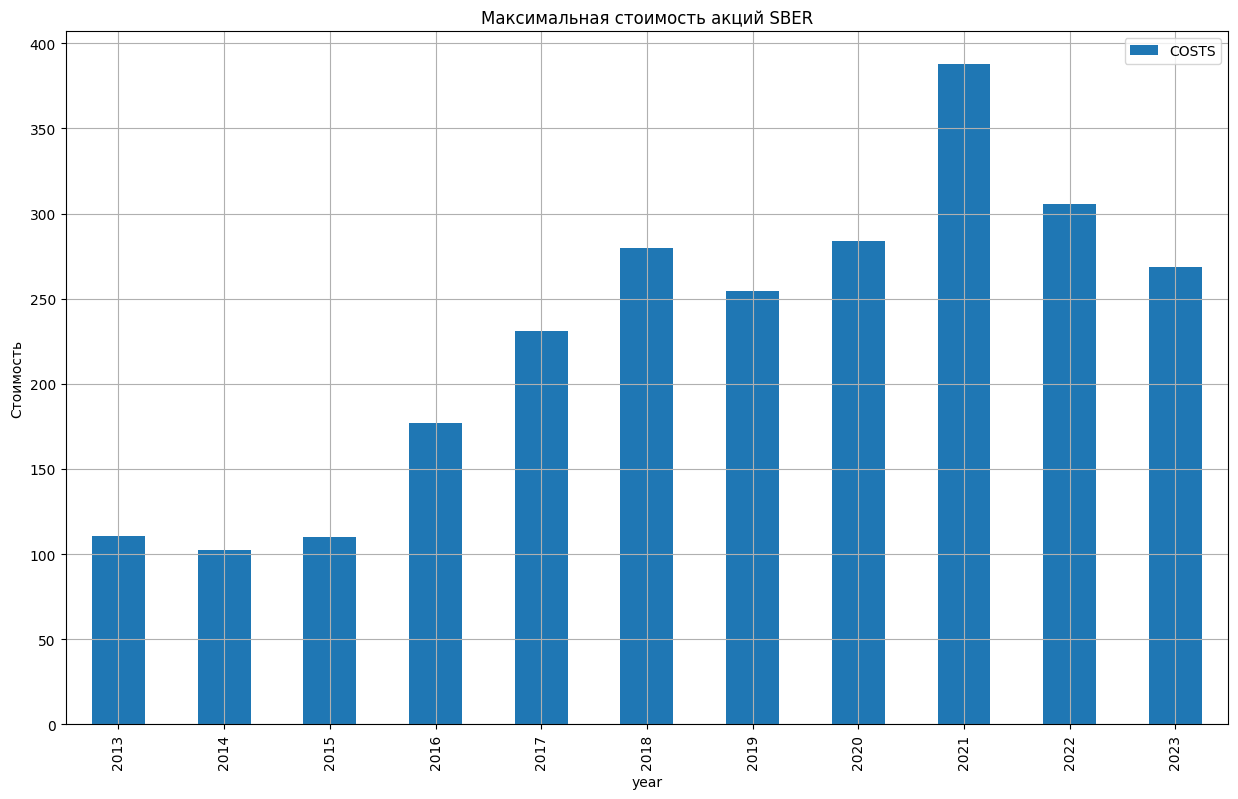

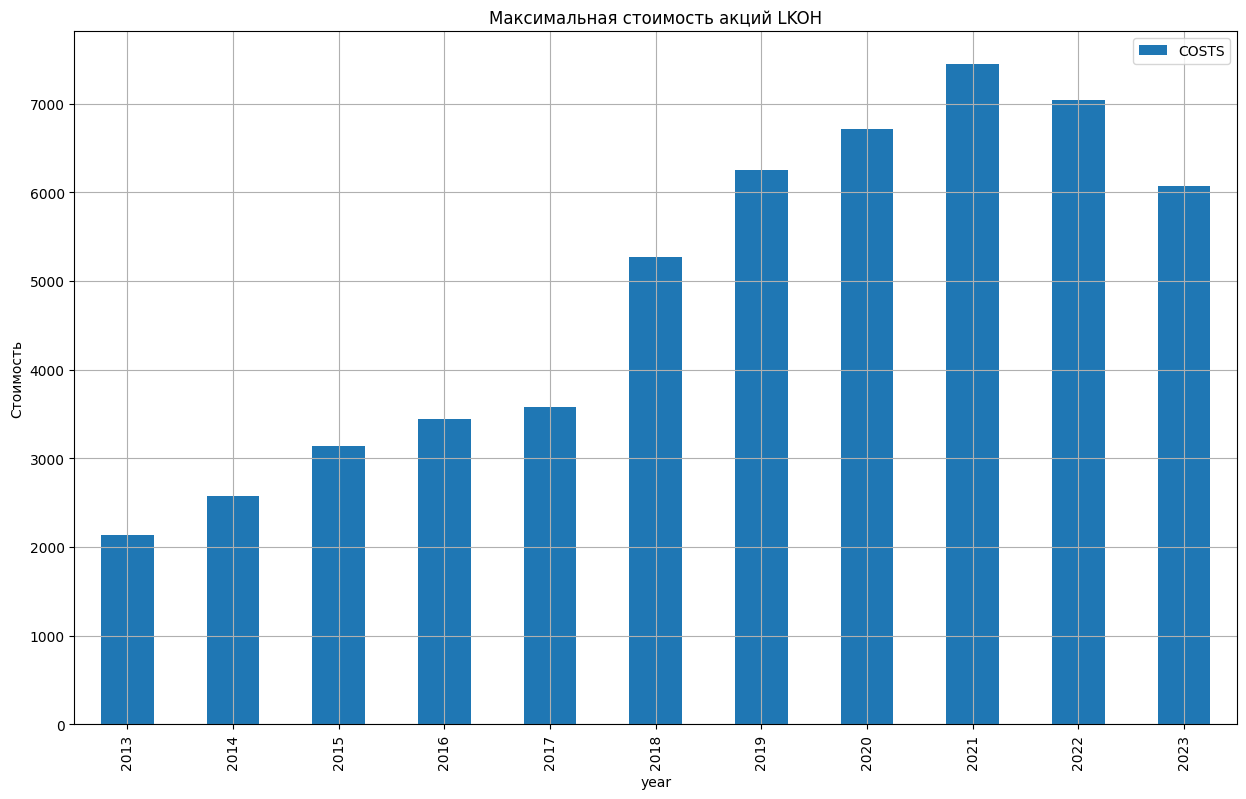

In [3]:
a=['SBER','LKOH']
for i in a:
    history(i);

In [4]:
tickers=["SBER","LKOH"]
df=pd.DataFrame()
for ticker in tickers:
    with req.Session() as session:
        data = apimoex.get_board_history(session,ticker,board="TQBR")
        df1 = pd.DataFrame(data)
        df1.set_index('TRADEDATE', inplace=True)
        df[ticker]=df1['CLOSE']
        #df['TRADEDATE']=pd.to_datetime(df['TRADEDATE'])
        #df.rename(columns= {'CLOSE':'COSTS'},inplace=True)
        #df['year']=df['TRADEDATE'].dt.year

In [6]:
df.tail(5)

,SBER,LKOH
TRADEDATE,,
2023-07-27,247.95,5668.0
2023-07-28,249.25,5896.0
2023-07-31,267.40,5938.0
2023-08-01,268.50,6008.0
2023-08-02,268.57,6069.5
